In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import xarray as xr
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.style.use("plot_style.mplstyle")

In [2]:
polarization_controller = xr.open_dataset("polarization_controller_dataset.nc")
polarization_controller

<xarray.Dataset>
Dimensions:                         (sweep_idd: 10001, fiber_num: 7,
                                     connector_num: 6, port: 4, heaters: 4,
                                     axis: 4, simulation_mode: 3, chip: 2)
Coordinates:
  * sweep_idd                       (sweep_idd) int32 0 1 2 ... 9998 9999 10000
  * fiber_num                       (fiber_num) object 'fiber_1' ... 'fiber_7'
  * connector_num                   (connector_num) object 'connector_1' ... ...
  * port                            (port) object 'reverse_top' ... 'forward_...
  * heaters                         (heaters) object 'PA-1:XPS1' ... 'MZI-1:X...
  * axis                            (axis) object 'rx' 'ry' 'rz' 'delta'
  * simulation_mode                 (simulation_mode) object 'dc_common' ... ...
  * chip                            (chip) object 'chip-1' 'chip-2'
Data variables:
    fiber_rotation                  (simulation_mode, sweep_idd, fiber_num, axis) float64 ...
    connector_loss                  (simulation_mode, sweep_idd, connector_num) float64 ...
    connector_return_loss           (simulation_mode, sweep_idd, connector_num) float64 ...
    input_state                     (simulation_mode, sweep_idd, port) float64 ...
    input_state_reverse             (simulation_mode, sweep_idd, port) float64 ...
    output_state_forward_intensity  (simulation_mode, sweep_idd, port) float64 ...
    output_state_reverse_intensity  (simulation_mode, sweep_idd, port) float64 ...
    heater_params                   (simulation_mode, sweep_idd, heaters) float64 ...
    io_loss                         (simulation_mode, sweep_idd, chip) float64 ...
    dc1                             (simulation_mode, sweep_idd) float64 ...
    dc2                             (simulation_mode, sweep_idd) float64 ...
    dc_sigma                        (simulation_mode, sweep_idd) float64 ...
Attributes:
    description:  Dataset for polarization controller bidi model
    author:       Ashwyn S
    created:      2023-11-29

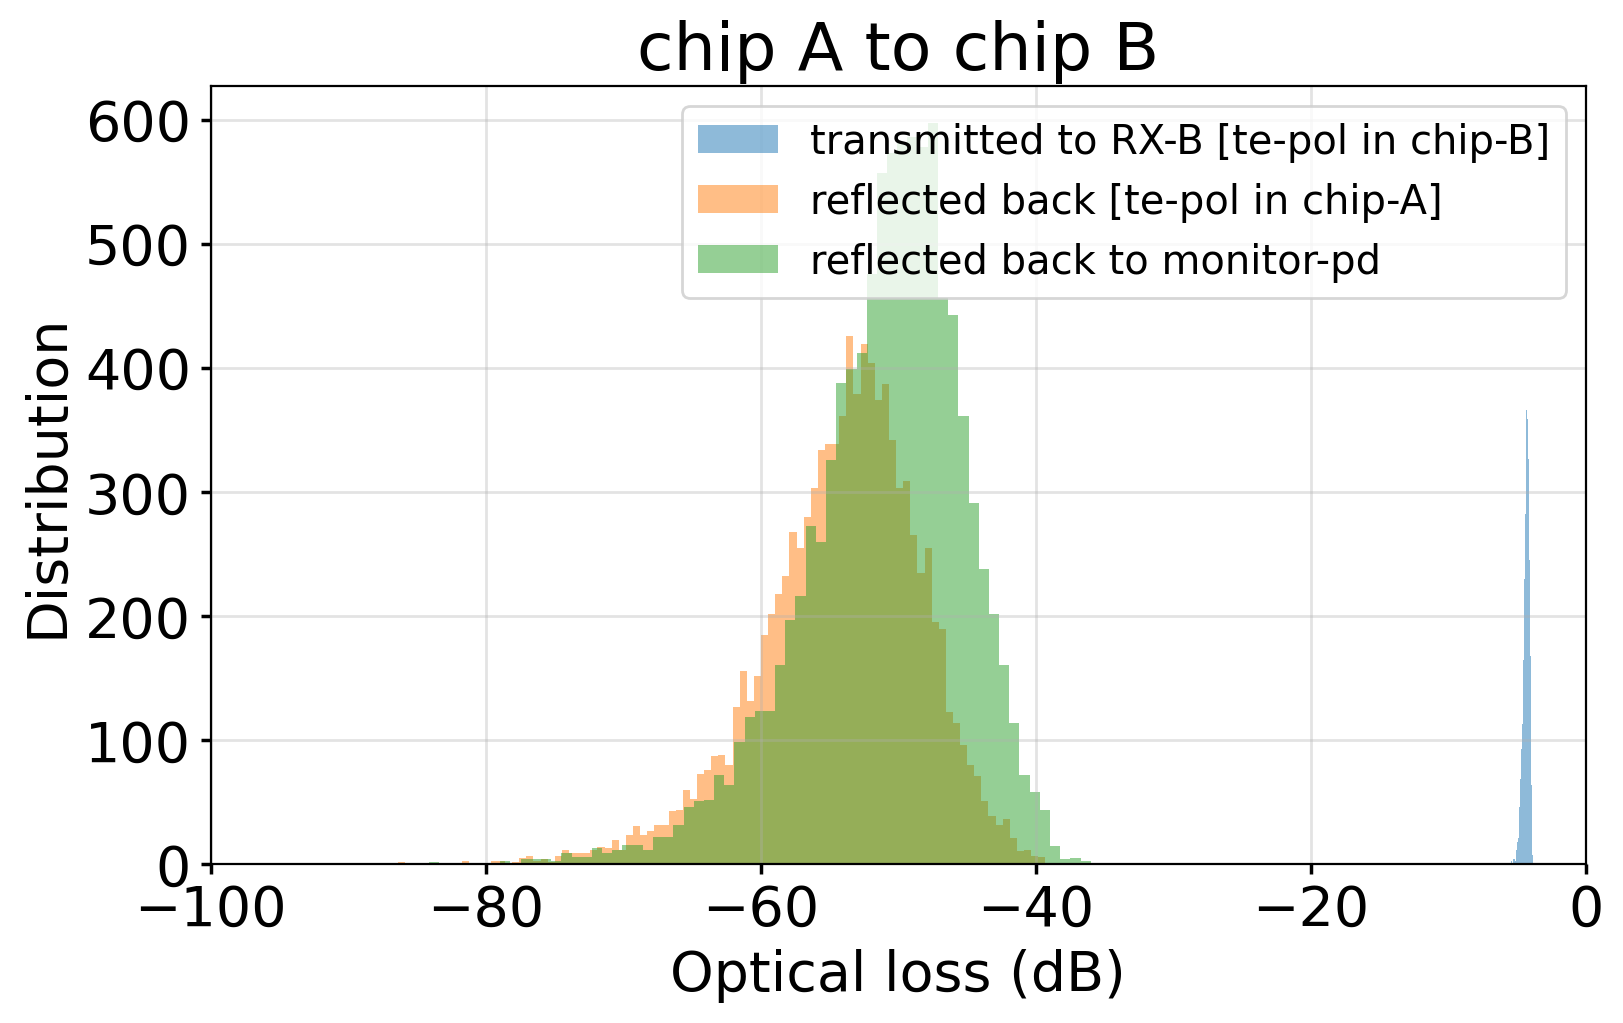

In [3]:
mc_pol_cont = polarization_controller['output_state_forward_intensity'].sel(simulation_mode = 'monte_carlo')
plt.hist(10*np.log10(mc_pol_cont.sel(port='forward_top')), bins = 100, alpha=0.5, label='transmitted to RX-B [te-pol in chip-B]')
plt.hist(10*np.log10(mc_pol_cont.sel(port='reverse_bottom')),bins = 100, alpha=0.5, label='reflected back [te-pol in chip-A]')
plt.hist(10*np.log10(mc_pol_cont.sel(port='reverse_top')), bins = 100,alpha=0.5, label='reflected back to monitor-pd')
plt.xlim([-100, 0])
plt.xlabel('Optical loss (dB)')
plt.ylabel('Distribution')
plt.title('chip A to chip B')
plt.legend()

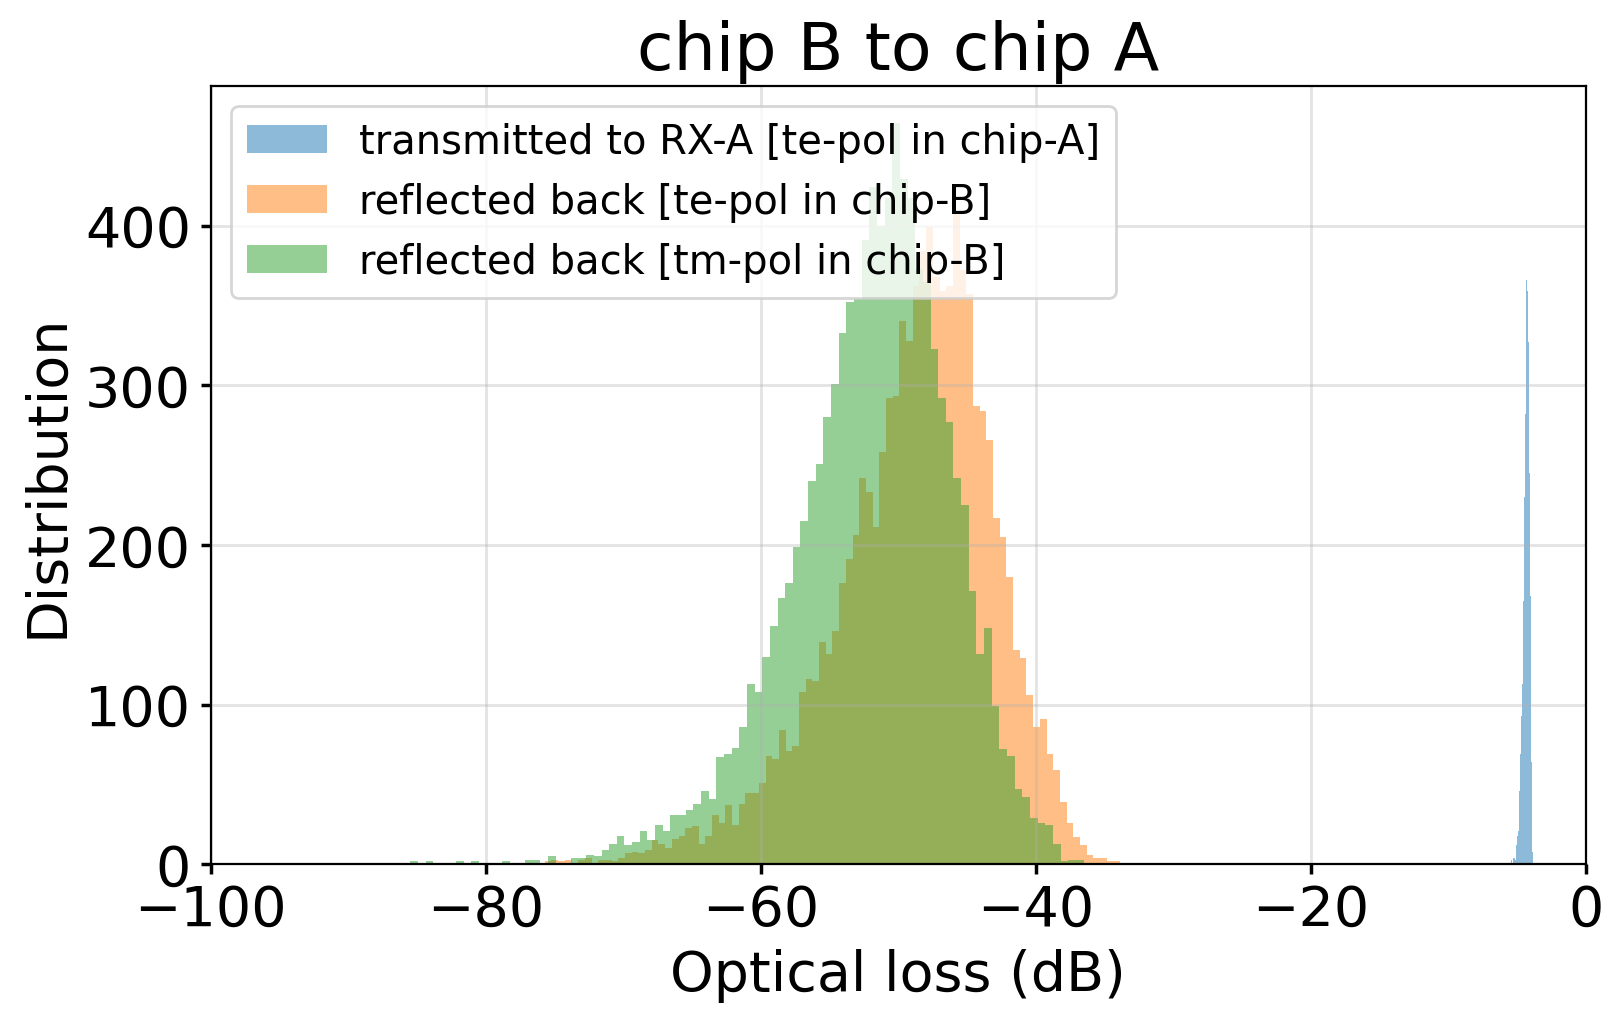

In [4]:
mc_pol_cont = polarization_controller['output_state_reverse_intensity'].sel(simulation_mode = 'monte_carlo')
plt.hist(10*np.log10(mc_pol_cont.sel(port='reverse_top')),bins=100, alpha=0.5, label='transmitted to RX-A [te-pol in chip-A]')
plt.hist(10*np.log10(mc_pol_cont.sel(port='forward_top')), bins=100, alpha=0.5, label='reflected back [te-pol in chip-B]')
plt.hist(10*np.log10(mc_pol_cont.sel(port='forward_bottom')), bins=100, alpha=0.5, label='reflected back [tm-pol in chip-B]')
plt.xlim([-100, 0])
plt.xlabel('Optical loss (dB)')
plt.ylabel('Distribution')
plt.title('chip B to chip A')
plt.legend()

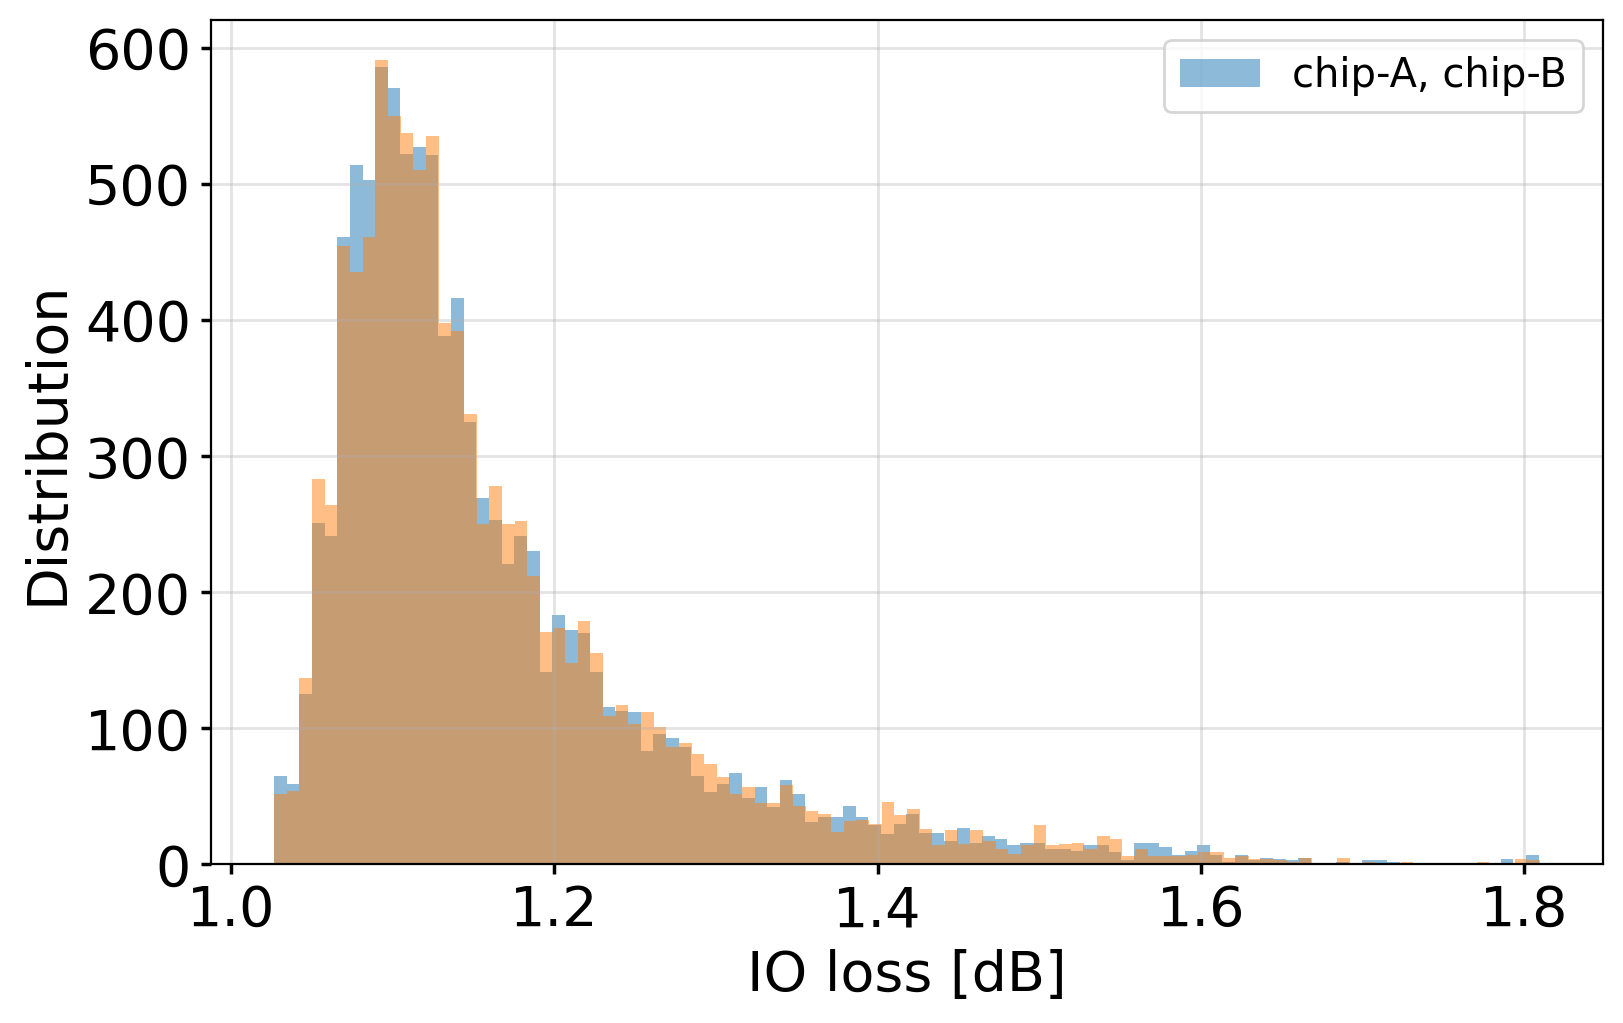

In [5]:
for chip in polarization_controller['chip'].values:
  mc_pol_cont = polarization_controller['io_loss'].sel(chip = chip, simulation_mode = 'monte_carlo')
  plt.hist(mc_pol_cont.values, bins=100,  alpha=0.5, label=chip)
plt.xlabel('IO loss [dB]')
plt.ylabel('Distribution')
plt.legend(['chip-A, chip-B'])

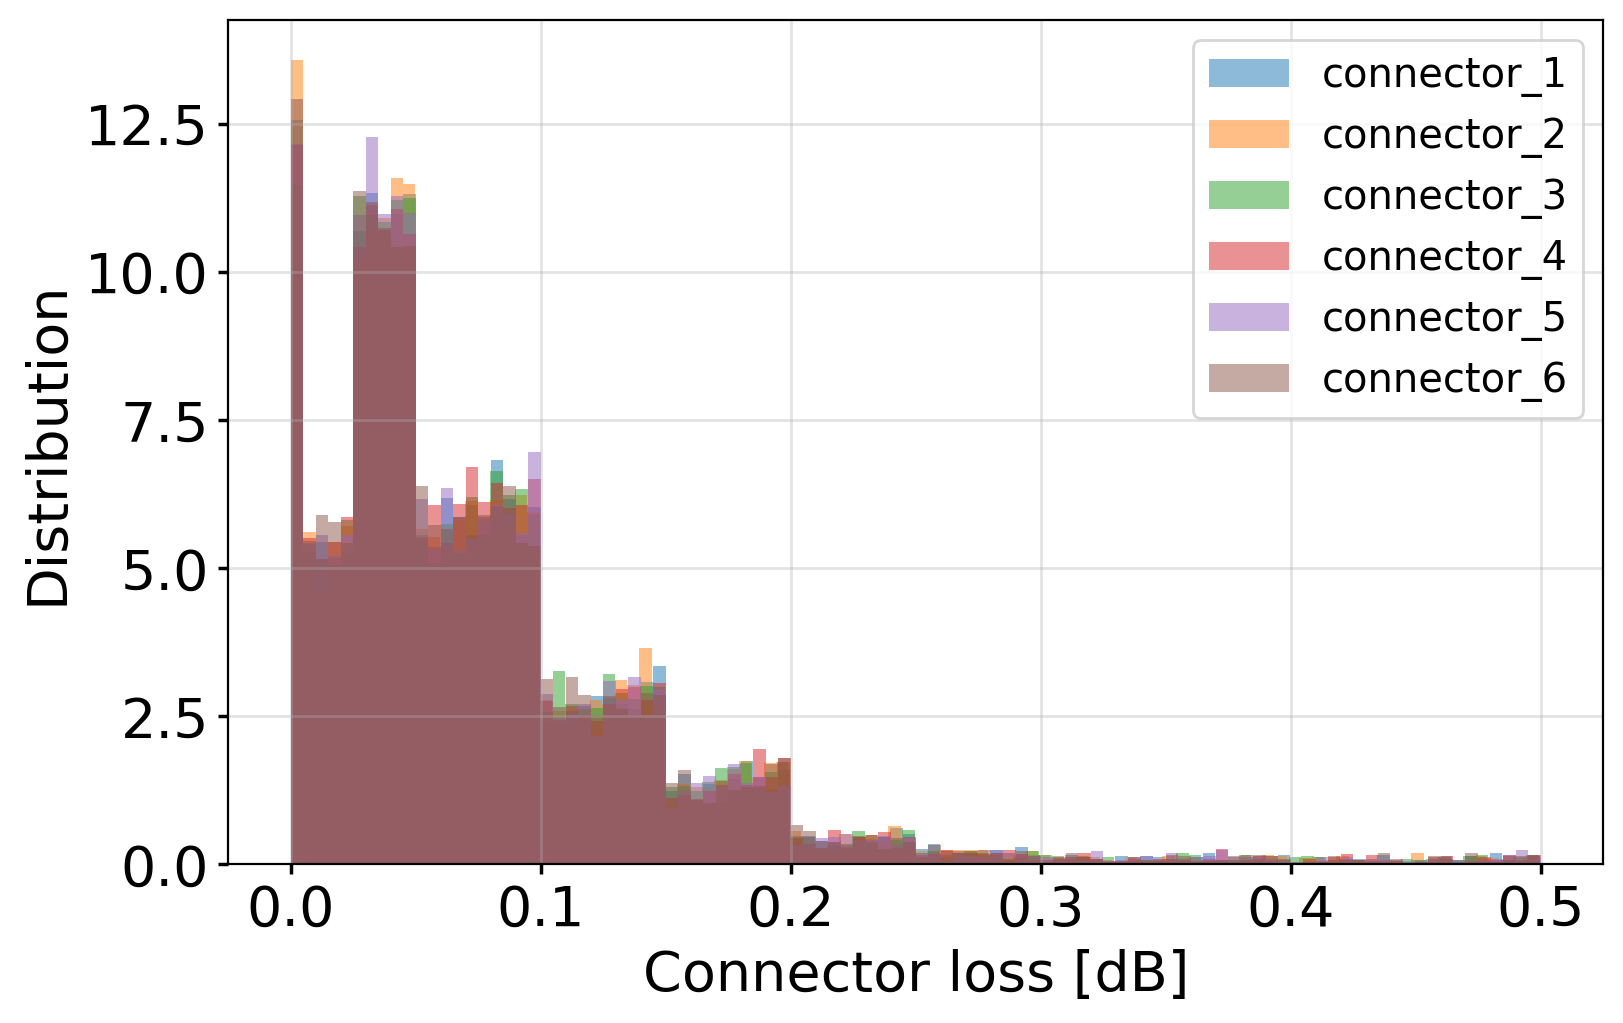

In [6]:
for connector in polarization_controller['connector_num'].values:
  mc_pol_cont = polarization_controller['connector_loss'].sel(connector_num = connector, simulation_mode = 'monte_carlo')
  plt.hist(mc_pol_cont.values, bins=100, density=True, alpha=0.5, label=connector)
plt.xlabel('Connector loss [dB]')
plt.ylabel('Distribution')
plt.legend()

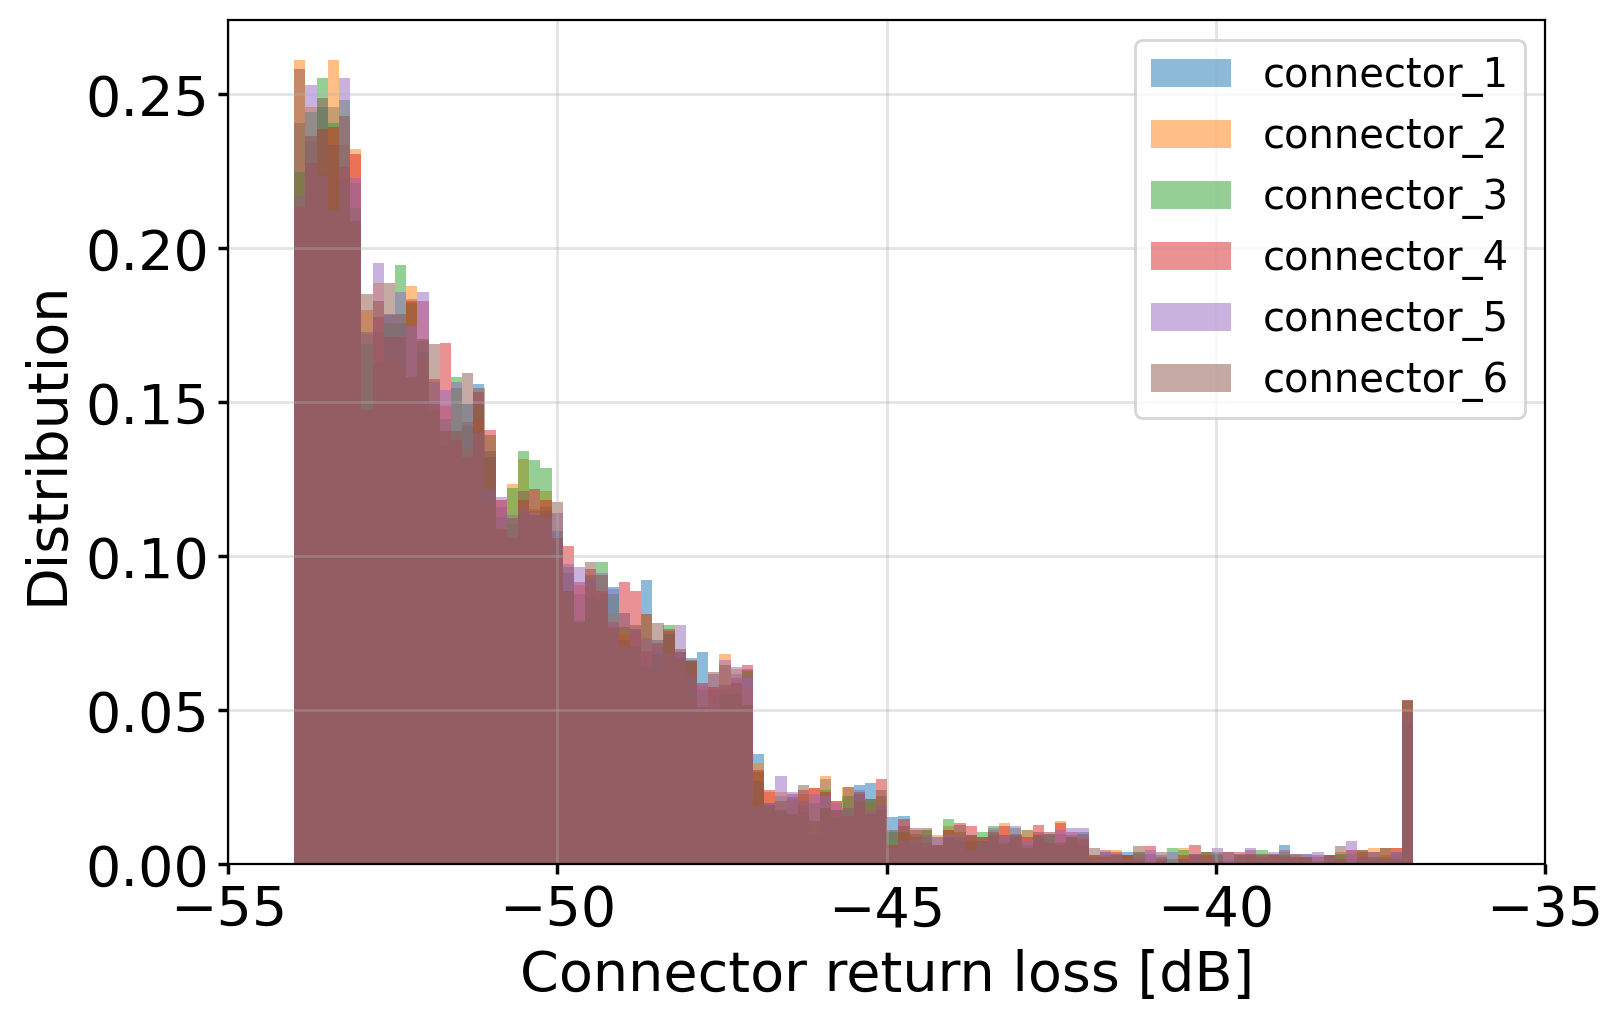

In [7]:
for connector in polarization_controller['connector_num'].values:
  mc_pol_cont = polarization_controller['connector_return_loss'].sel(connector_num = connector, simulation_mode = 'monte_carlo')
  plt.hist(mc_pol_cont.values, bins=100, density=True, alpha=0.5, label=connector)
plt.xlabel('Connector return loss [dB]')
plt.ylabel('Distribution')
plt.xticks(np.arange(-55, -30, 5))
plt.legend()

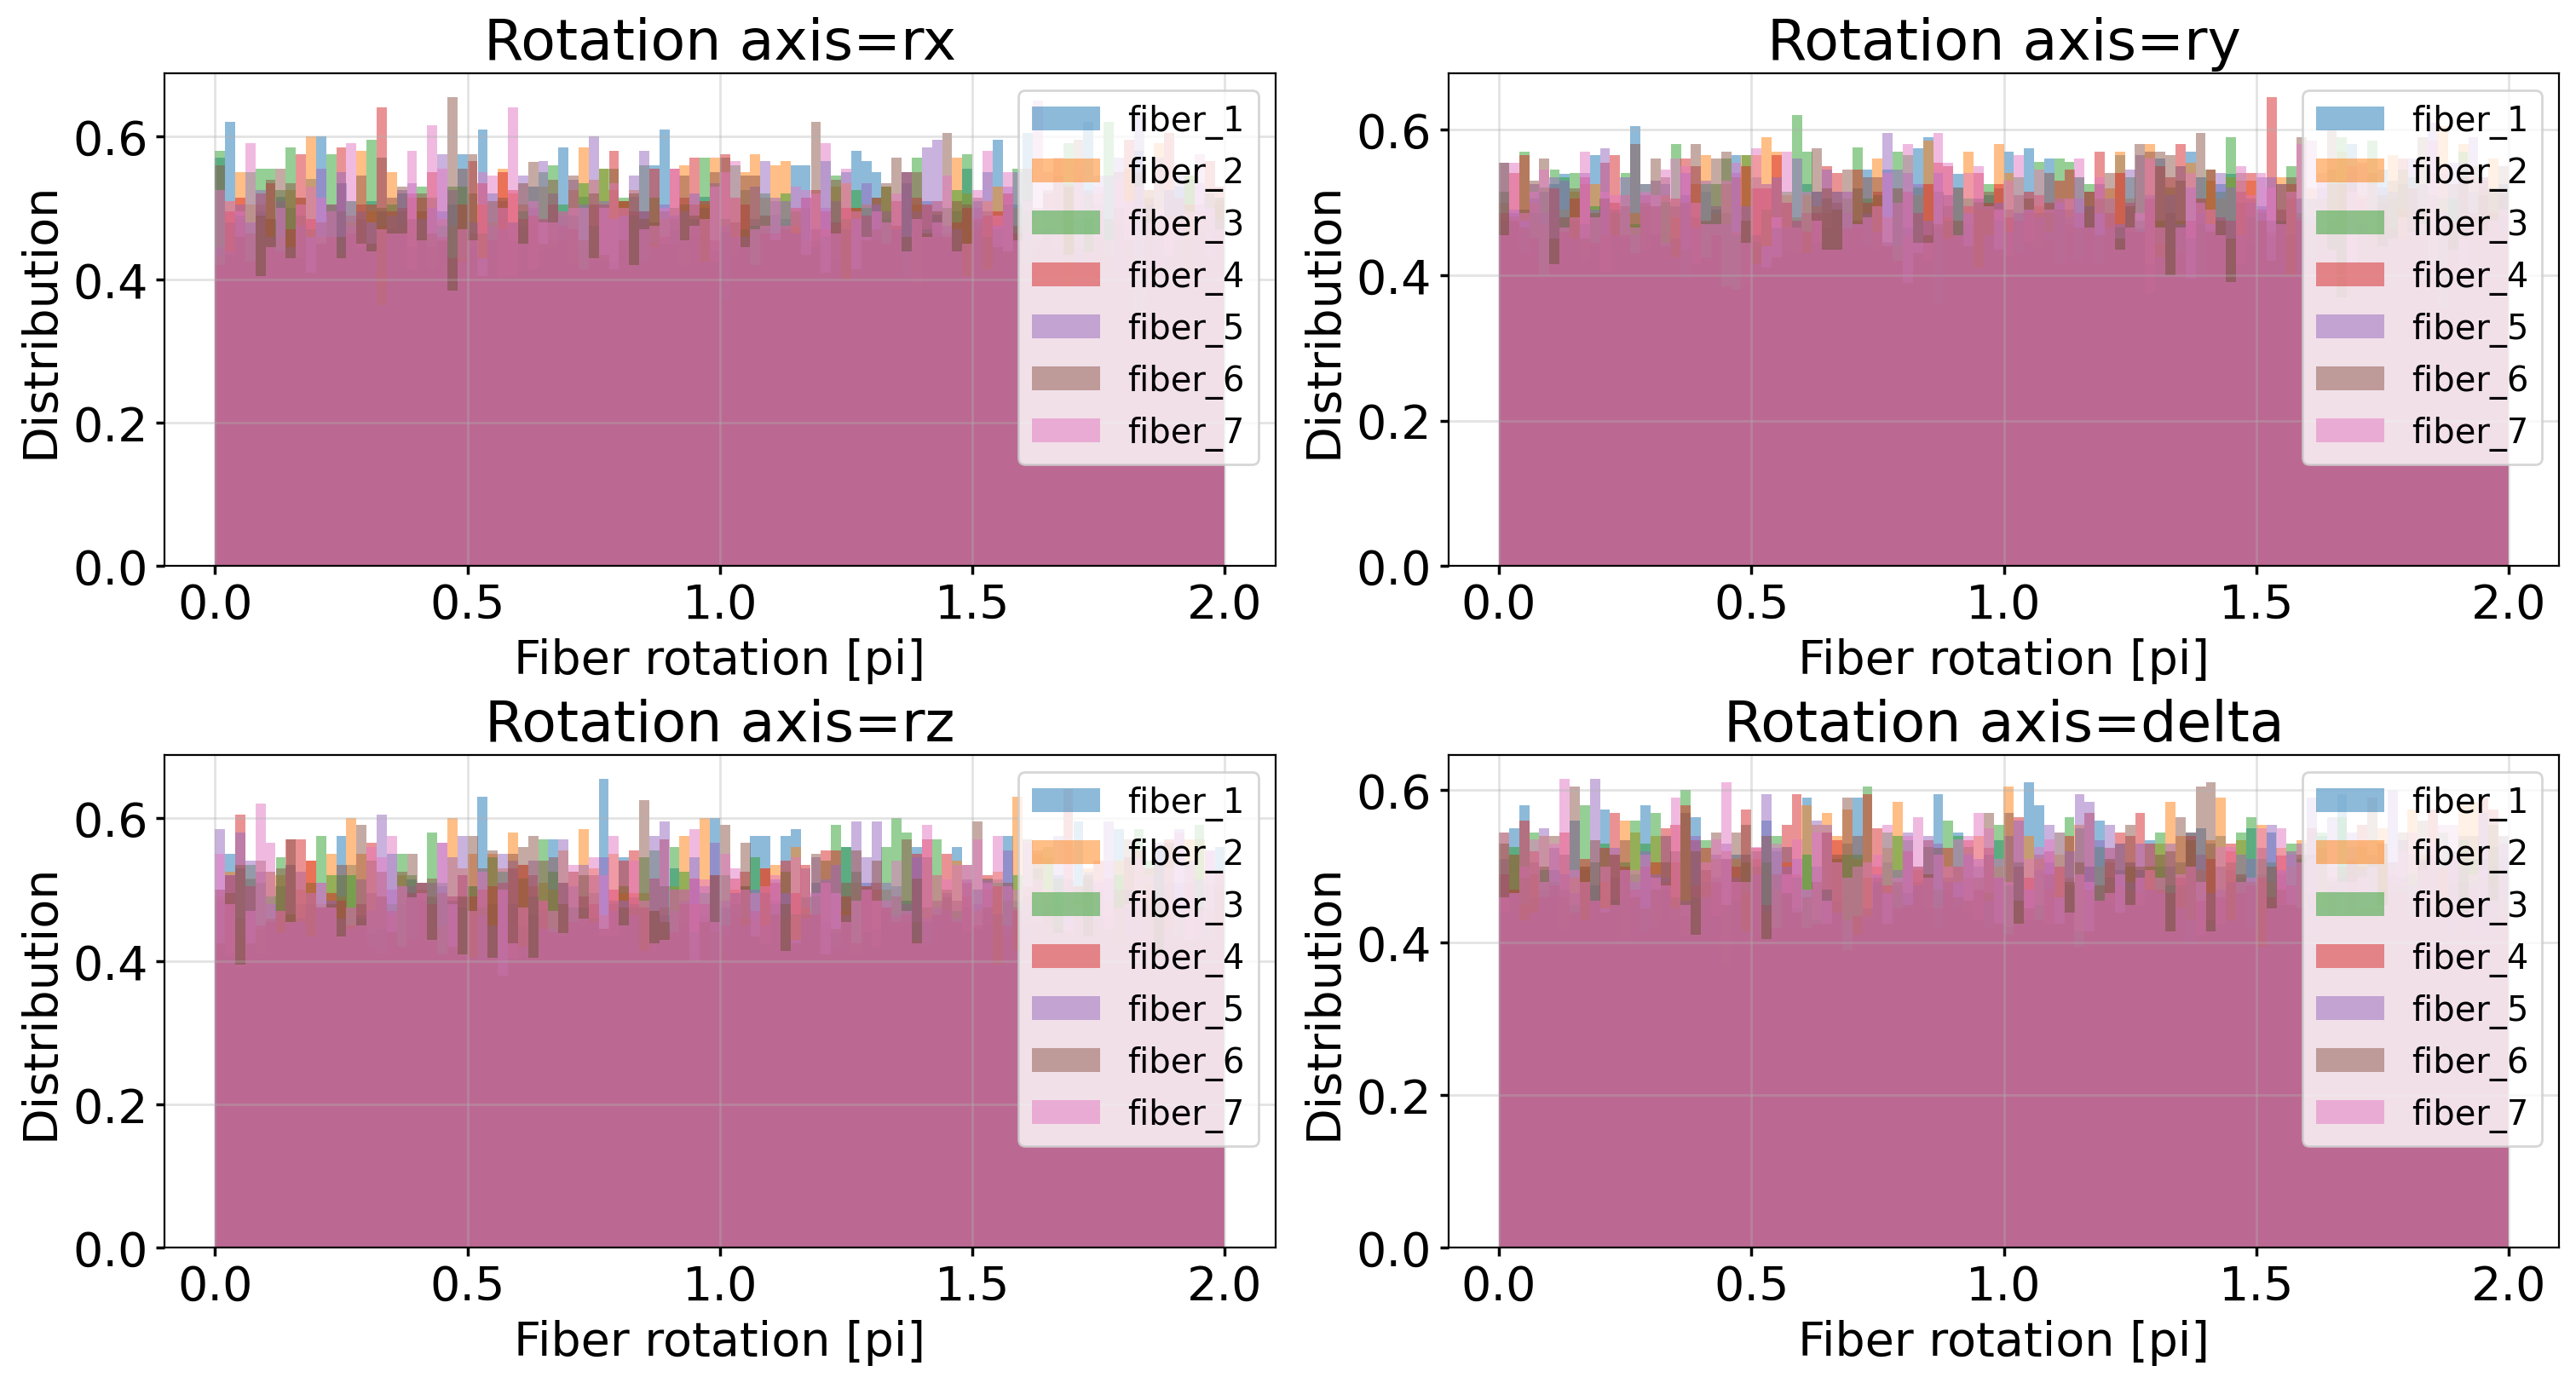

In [8]:
plt.figure(figsize=(15,8))
for idd_axis, axis in enumerate(polarization_controller['axis'].values):
  plt.subplot(2,2,idd_axis+1)
  for fiber in polarization_controller['fiber_num'].values:
    mc_pol_cont = polarization_controller['fiber_rotation'].sel(axis = axis, fiber_num = fiber, simulation_mode = 'monte_carlo')
    plt.hist(mc_pol_cont.values/np.pi, bins=100, density=True, alpha=0.5, label=fiber)
  plt.xlabel('Fiber rotation [pi]')
  plt.ylabel('Distribution')
  plt.title("Rotation axis=" + axis)
  plt.legend()